In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mne
!pip install pymatreader
!pip install python-picard

import mne
import pymatreader
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio

import os
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 3.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %matplotlib widget
# %matplotlib qt
%matplotlib inline

In [ ]:
# Importing the DEAP dataset
path='/content/drive/My Drive/Dissertation/DEAP/data_original/s01.bdf'

In [ ]:
# Reshaping
path='/content/drive/My Drive/Dissertation/DEAP/data_preprocessed_matlab/s01.mat'
sub_data_file = sio.loadmat(path)
X = sub_data_file['data']
X=X[:,:32,:]

y = sub_data_file['labels']
y=y[:,:3]

Extracting EDF parameters from /content/drive/My Drive/Dissertation/DEAP/data_original/s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
Not setting metadata
40 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 359 original time points ...
1 bad epochs dropped
Using up to 485 segments
Number of samples used : 48450
[done]


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


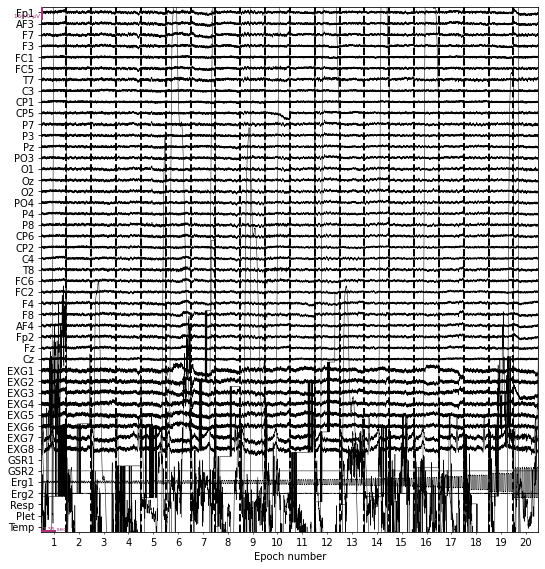

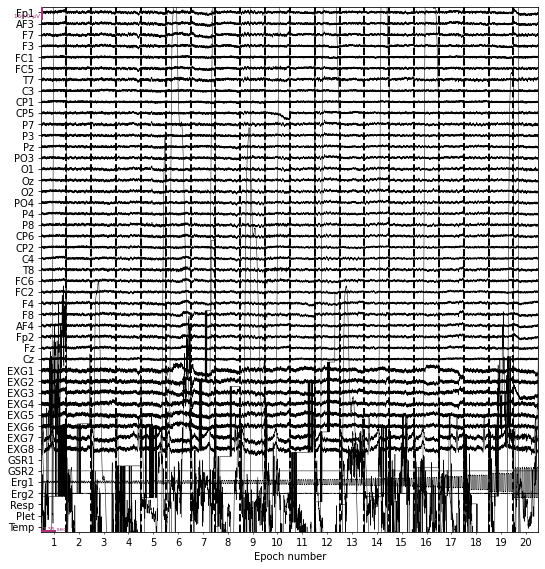

In [ ]:
#raw signal for ALL EPOCHS ALL 48 SIGNALS
channels=['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4',
          'T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','EXG1','EXG2','EXG3','EXG4','EXG5','EXG6','EXG7','EXG8','GSR1','GSR2','Erg1',
          'Erg2','Resp','Plet','Temp','Status']

sigs=['ecg', 'bio', 'stim', 'eog', 'misc', 'seeg', 'dbs', 'ecog', 'mag','eeg','ref_meg', 'grad', 'emg', 'hbr','hbo']

scalings=dict(mag=1e-12, grad=4e-11, eeg=80e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

montage_1020 = mne.channels.make_standard_montage('standard_1020')
raw=mne.io.read_raw_bdf(path,infer_types=True,stim_channel='auto',preload=True)
# raw.set_montage(montage_1020)

events=mne.make_fixed_length_events(raw,id=1,start=0,duration=95)
epochs=mne.Epochs(raw,events,preload=True)

eeg_channels = mne.pick_types(epochs.info, eeg=True,emg=True,ecg=True,eog=True)
# cov=mne.compute_covariance(epochs, tmin=-2,tmax=95)
cov=mne.compute_raw_covariance(raw,tmin=-2,tmax=95,picks=eeg_channels)
epochs.plot(scalings=scalings,order=eeg_channels,n_channels=47,show_scrollbars=False)

Extracting EDF parameters from /content/drive/My Drive/Dissertation/DEAP/data_original/s01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1980927  =      0.000 ...  3868.998 secs...
Not setting metadata
40 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 359 original time points ...
1 bad epochs dropped
Using up to 485 segments
Number of samples used : 48450
[done]


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


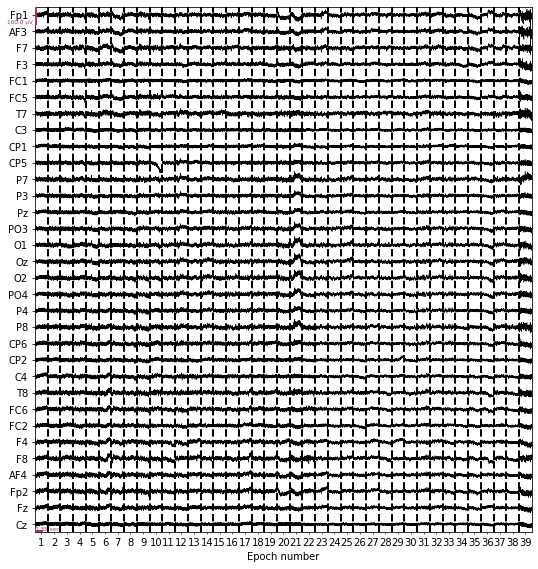

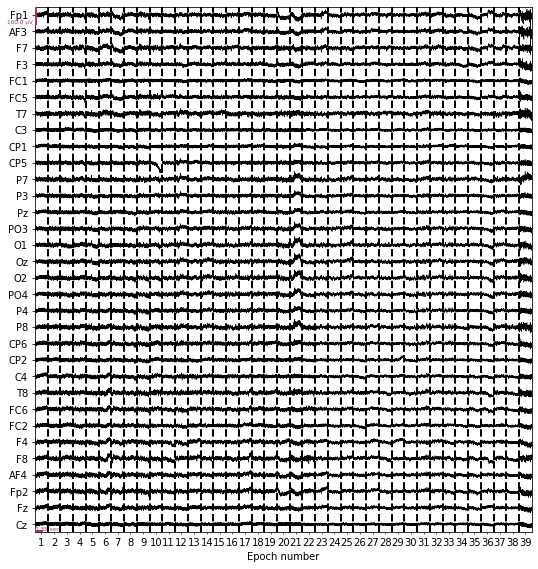

In [ ]:
#raw signal for ALL EPOCHS ONLY THE FIRST 36
channels=['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4',
          'T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','EXG1','EXG2','EXG3','EXG4','EXG5','EXG6','EXG7','EXG8','GSR1','GSR2','Erg1',
          'Erg2','Resp','Plet','Temp','Status']

sigs=['ecg', 'bio', 'stim', 'eog', 'misc', 'seeg', 'dbs', 'ecog', 'mag','eeg','ref_meg', 'grad', 'emg', 'hbr','hbo']

scalings=dict(mag=1e-12, grad=4e-11, eeg=80e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

montage_1020 = mne.channels.make_standard_montage('standard_1020')
raw=mne.io.read_raw_bdf(path,eog=['EXG1', 'EXG2', 'EXG3', 'EXG4'],
                              exclude=['EXG5', 'EXG6', 'EXG7', 'EXG8', 
                                      'GSR1', 'GSR2', 'Erg1', 'Erg2',
                                      'Resp', 'Plet', 'Temp'],
                        infer_types=True,stim_channel='auto',preload=True)
raw.set_montage(montage_1020)

events=mne.make_fixed_length_events(raw,id=1,start=0,duration=95)
epochs=mne.Epochs(raw,events,preload=True)

eeg_channels = mne.pick_types(epochs.info, eeg=True,emg=True,ecg=True,eog=True)
# cov=mne.compute_covariance(epochs, tmin=-2,tmax=95)
cov=mne.compute_raw_covariance(raw,tmin=-2,tmax=95,picks=eeg_channels)
epochs.plot(scalings=scalings,order=eeg_channels,n_channels=36,n_epochs=40,show_scrollbars=False)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-58-3b180393edab>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd(picks=eeg_channels,fmin=4,fmax=50,average=False,spatial_colors=True)


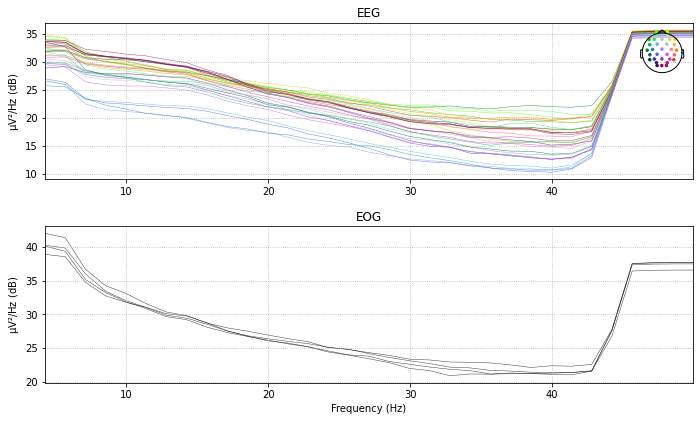

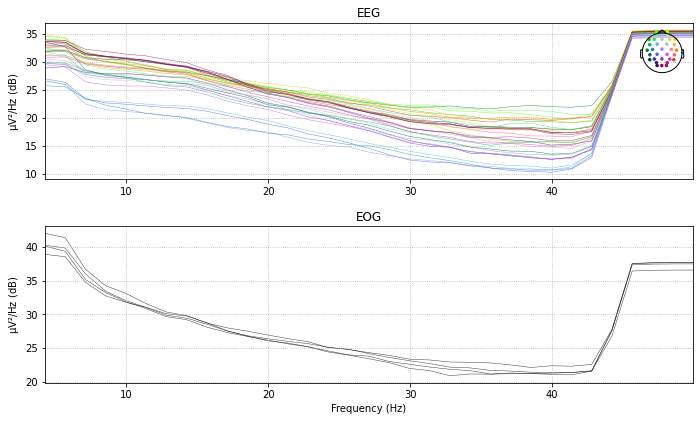

In [ ]:
epochs.plot_psd(picks=eeg_channels,fmin=4,fmax=50,average=False,spatial_colors=True)

In [ ]:
#artifact detection
ssp_projectors = epochs.info['projs']
epochs.del_proj()

<Epochs |  39 events (all good), -0.199219 - 0.5 sec, baseline -0.199219 – 0 sec, ~4.0 MB, data loaded,
 '1': 39>

In [ ]:
#applying the band-pass filter
filt_raw = raw.copy().filter(l_freq=4, h_freq=50,picks=eeg_channels)
events=mne.make_fixed_length_events(filt_raw,id=1,start=0,duration=95)
epochs=mne.Epochs(filt_raw,events,preload=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


Not setting metadata
40 matching events found
Setting baseline interval to [-0.19921875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 359 original time points ...
1 bad epochs dropped


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.5s finished


In [ ]:
#ICA
ica = ICA(n_components=36,noise_cov=cov,method='fastica',max_iter='auto',random_state=97)
ica.fit(epochs,picks=eeg_channels,reject_by_annotation=True)

Fitting ICA to data using 36 channels (please be patient, this may take a while)
Computing rank from covariance with rank=None
    Using tolerance 8.6e-12 (2.2e-16 eps * 32 dim * 1.2e+03  max singular value)
    Estimated rank (eeg): 32
    EEG: rank 32 computed from 32 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 32 (4 small eigenvalues omitted)
Selecting by number: 36 components


<ipython-input-61-09b12edc0e2a>:3: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs,picks=eeg_channels,reject_by_annotation=True)
<ipython-input-61-09b12edc0e2a>:3: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  ica.fit(epochs,picks=eeg_channels,reject_by_annotation=True)


Fitting ICA took 2.7s.


<ipython-input-61-09b12edc0e2a>:3: RuntimeWarning: Using n_components=36 (resulting in n_components_=36) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.55) and smallest (2.1e-33) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 32
  ica.fit(epochs,picks=eeg_channels,reject_by_annotation=True)


<ICA | epochs decomposition, method: fastica (fit in 90 iterations on 14001 samples), 36 ICA components explaining 100.0 % of variance (36 PCA components available), channel types: eeg, no sources marked for exclusion>

Not setting metadata
39 matching events found
No baseline correction applied
0 projection items activated


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


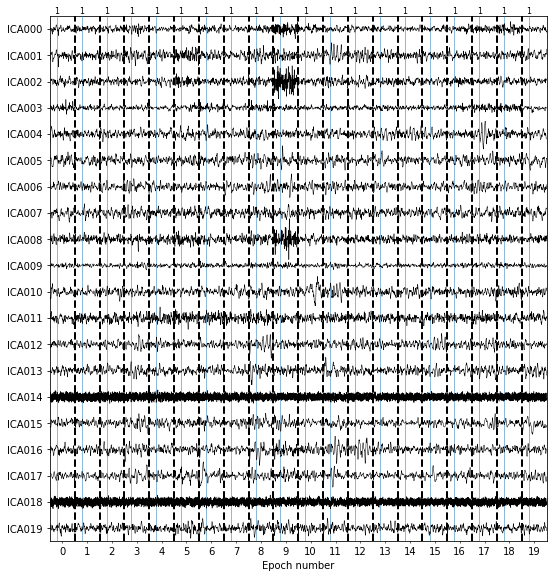

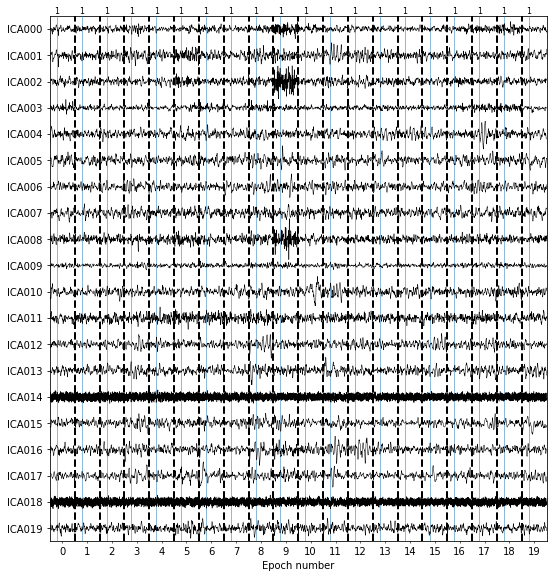

In [ ]:
ica.plot_sources(epochs,picks=eeg_channels, show_scrollbars=False,block=False,title='Independent Components')

In [ ]:
ica.plot_properties(epochs,picks=eeg_channels,dB=True,plot_std=True)

Output hidden; open in https://colab.research.google.com to view.

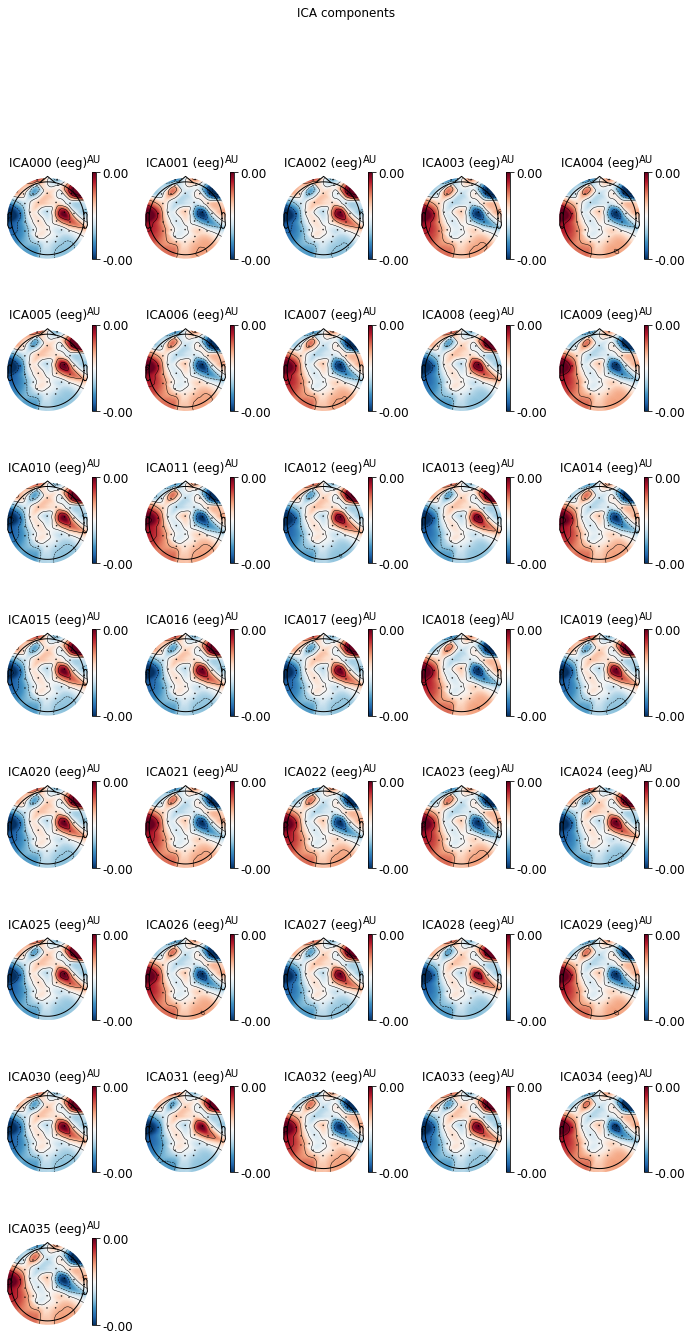

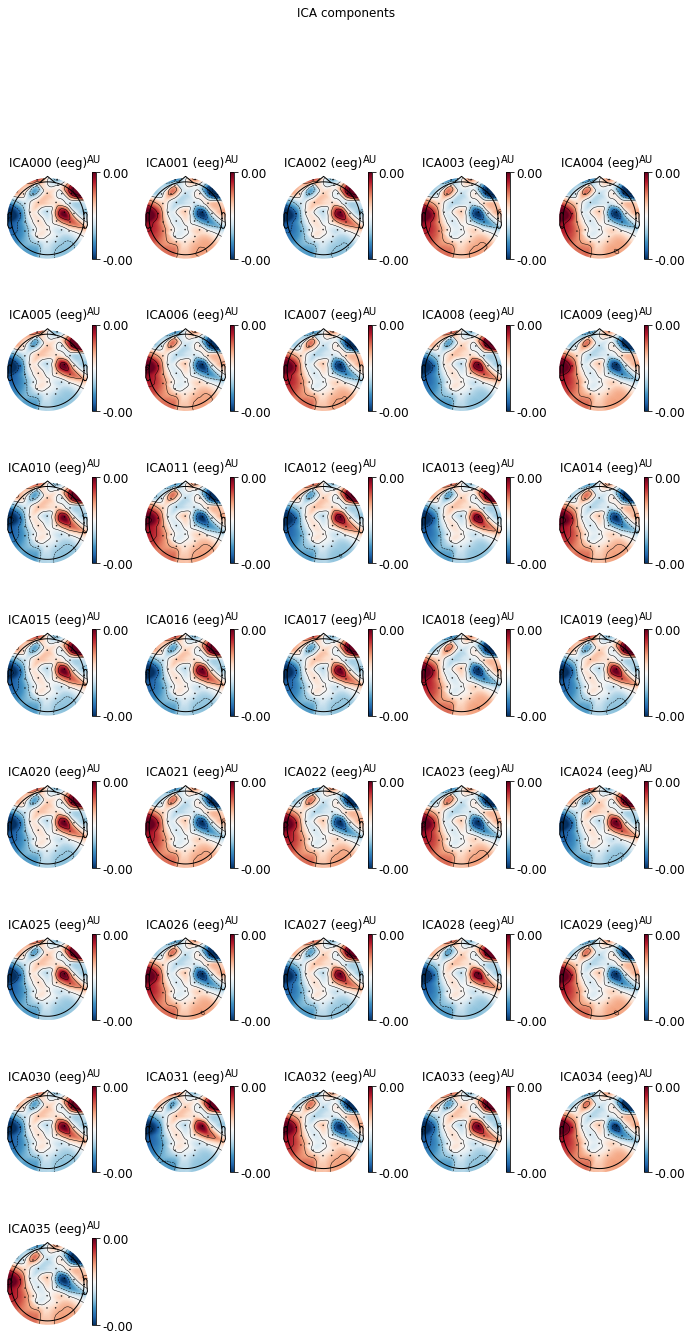

In [ ]:
ica.plot_components(picks=eeg_channels,colorbar=True)

Applying ICA to Epochs instance
    Transforming to ICA space (36 components)
    Zeroing out 35 ICA components
    Projecting back using 36 PCA components


<ipython-input-52-176f4e3154c3>:7: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(reconst_epoch,ica.exclude)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


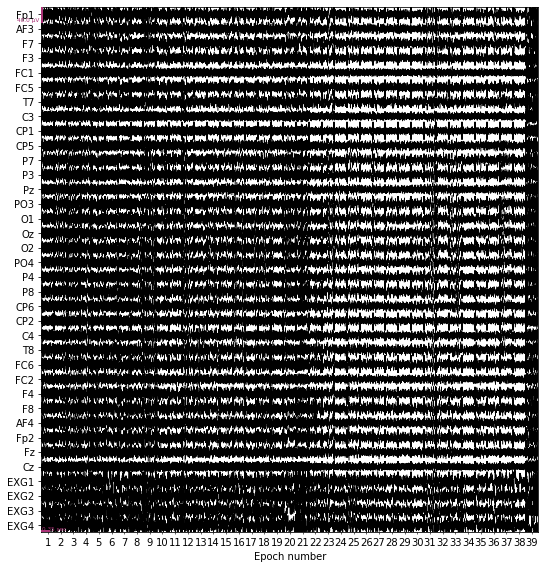

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


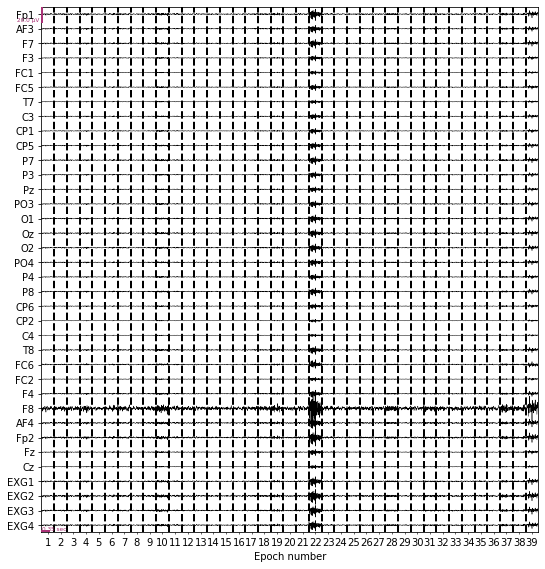

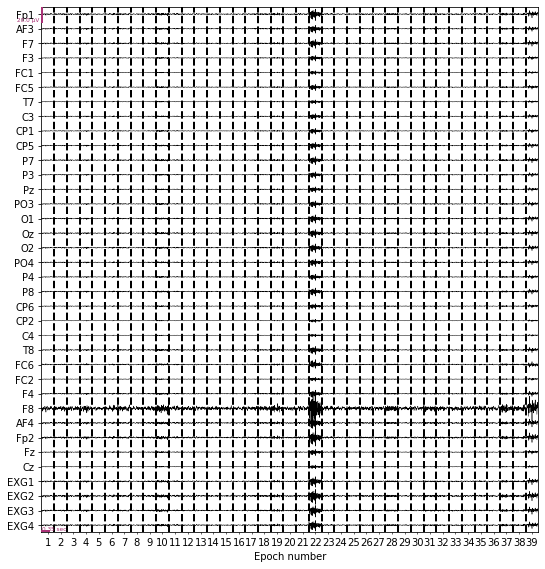

In [ ]:
ica.exclude=[32]
_scalings=dict(mag=1e-12, grad=4e-11, eeg=20e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

reconst_epoch=epochs.copy()
ica.apply(reconst_epoch,ica.exclude)
epochs.plot(scalings=_scalings,picks=eeg_channels,n_epochs=40,n_channels=36,show_scrollbars=False)

scalings=dict(mag=1e-12, grad=4e-11, eeg=10e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

reconst_epoch.plot(scalings=scalings,picks=eeg_channels,n_epochs=40,n_channels=36,show_scrollbars=False)

In [ ]:
# Importing the DEAP dataset
import scipy.io as sio
path='/content/drive/My Drive/Dissertation/DEAP/data_preprocessed_matlab/s'+'01'+'.mat'
sub_data_file = sio.loadmat(path)
X = sub_data_file['data']
X=X[:,:32,:]
y = sub_data_file['labels']
y=y[:,:3]

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.
Using up to 325 segments
Number of samples used : 8190
[done]
Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


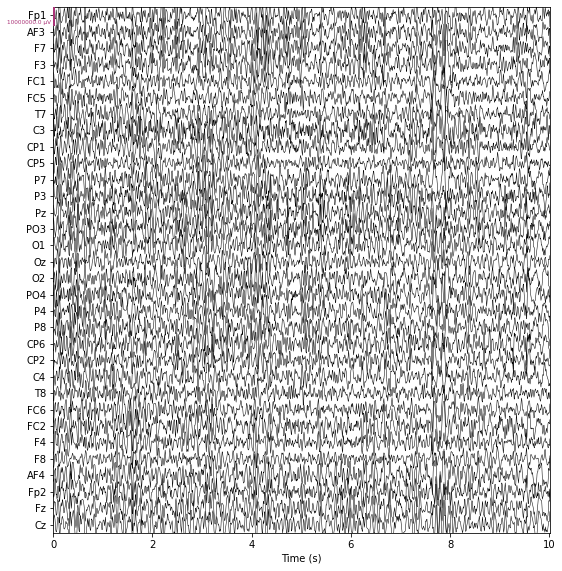

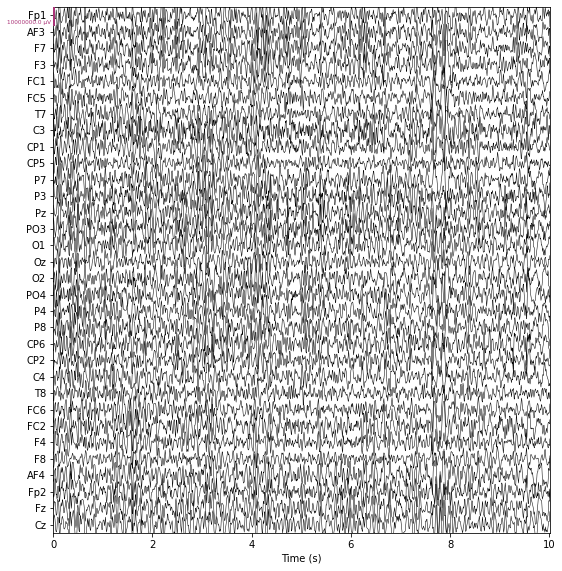

In [ ]:
# ONE EPOCH ONLY
channels=['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4',
          'T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
sigs=['ecg', 'bio', 'stim', 'eog', 'misc', 'seeg', 'dbs', 'ecog', 'mag','eeg','ref_meg', 'grad', 'emg', 'hbr','hbo']
info=mne.create_info(ch_names=channels,sfreq=128,ch_types='eeg')

scalings=dict(mag=1e-12, grad=4e-11, eeg=50e-1, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

montage_1020 = mne.channels.make_standard_montage('standard_1020')
raw=mne.io.RawArray(X[0],info)
raw.set_montage(montage_1020)

eeg_channels = mne.pick_types(raw.info, eeg=True,emg=True,ecg=True)
cov=mne.compute_raw_covariance(raw, tmin=-2,tmax=63)

raw.plot(scalings=scalings,order=eeg_channels,n_channels=32,show_scrollbars=False)

Effective window size : 16.000 (s)


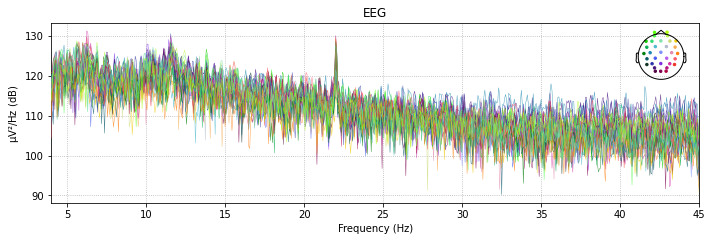

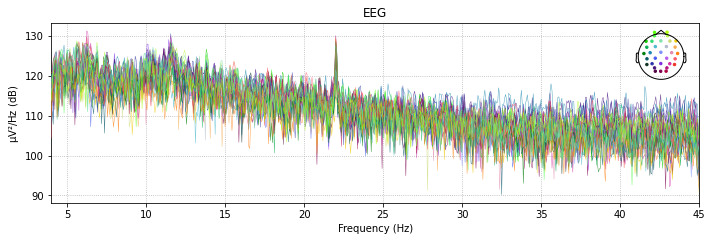

In [ ]:
# PLOT PSD
raw.plot_psd(picks=eeg_channels,fmin=4,fmax=45,tmin=-2,tmax=60,average=False,spatial_colors=True)

In [ ]:
#artifact detection
ssp_projectors = raw.info['projs']
raw.del_proj()

<RawArray | 32 x 8064 (63.0 s), ~2.0 MB, data loaded>

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


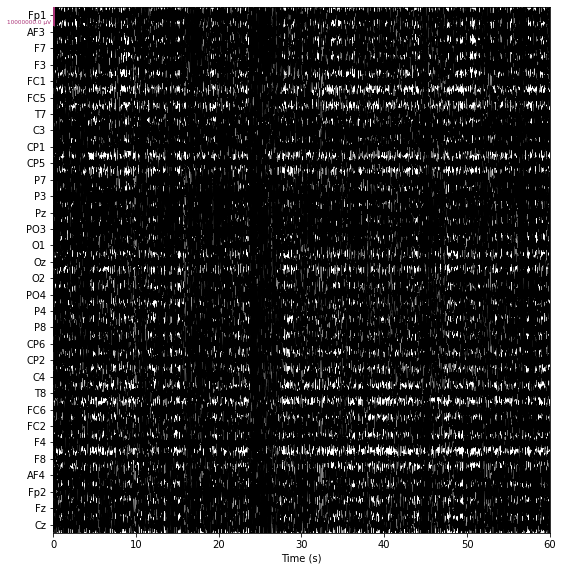

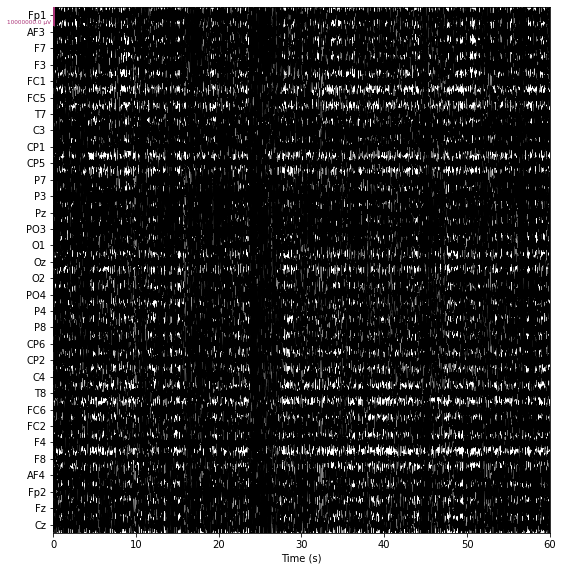

In [ ]:
#low-frequency drifts (slow drifts)
raw.plot(scalings=scalings,duration=60,order=eeg_channels,n_channels=32,show_scrollbars=False,remove_dc=False,proj=False)

In [ ]:
#applying the band-pass filter
filt_raw = raw.copy().filter(l_freq=4, h_freq=45,picks=eeg_channels)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 213 samples (1.664 sec)



In [ ]:
#ICA WITH THE FIRST EPOCH ONLY
ica = ICA(n_components=32,noise_cov=cov,method='fastica',max_iter='auto',random_state=97)
ica.fit(filt_raw,picks=eeg_channels,reject_by_annotation=True)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Computing rank from covariance with rank=None
    Using tolerance 0.015 (2.2e-16 eps * 32 dim * 2.2e+12  max singular value)
    Estimated rank (eeg): 31
    EEG: rank 31 computed from 32 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 31 (1 small eigenvalues omitted)
Selecting by number: 32 components


<ipython-input-149-2759fefab422>:3: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  ica.fit(filt_raw,picks=eeg_channels,reject_by_annotation=True)


Fitting ICA took 7.9s.


<ipython-input-149-2759fefab422>:3: RuntimeWarning: Using n_components=32 (resulting in n_components_=32) may lead to an unstable mixing matrix estimation because the ratio between the largest (1) and smallest (2e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 31
  ica.fit(filt_raw,picks=eeg_channels,reject_by_annotation=True)


<ICA | raw data decomposition, method: fastica (fit in 204 iterations on 8064 samples), 32 ICA components explaining 100.0 % of variance (32 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.
Opening ica-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


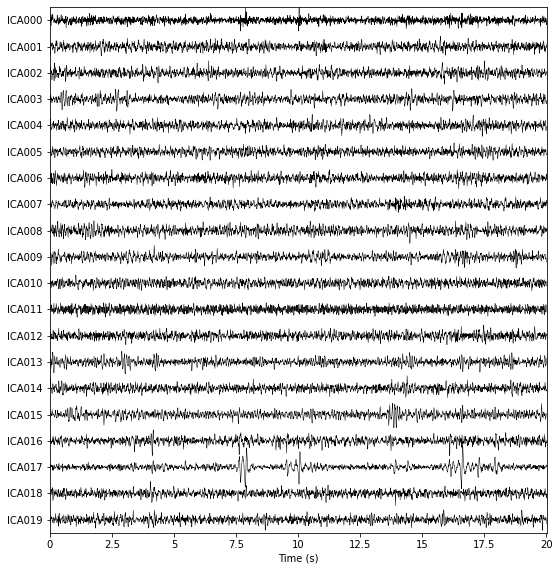

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components
Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


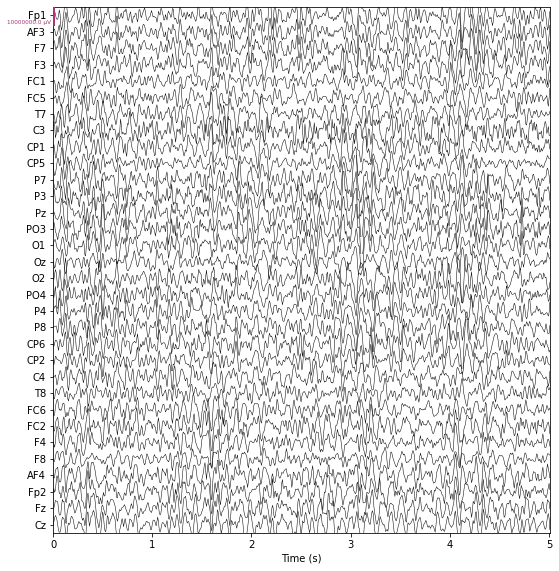

Opening raw-browser...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


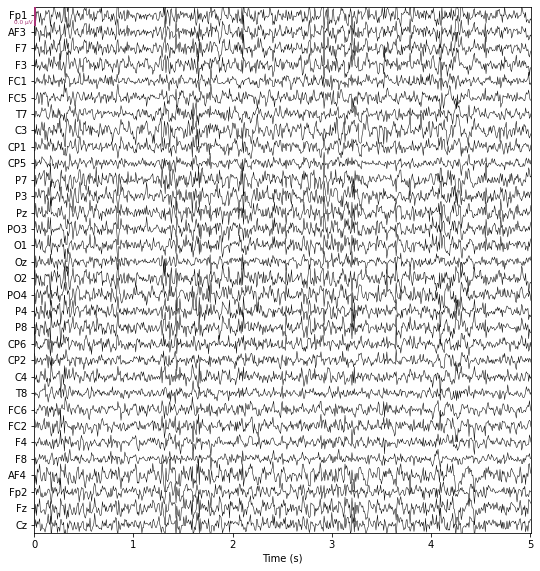

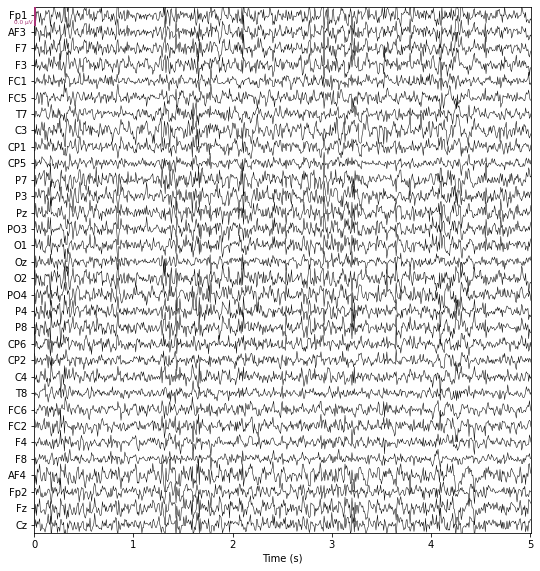

In [ ]:
#ICA WITH THE FIRST EPOCH ONLY
ica.exclude = []
scalings=dict(mag=1e-12, grad=4e-11, eeg=50e-1, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)
_scalings=dict(mag=1e-12, grad=4e-11, eeg=2e-16, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1, chpi=1e-4, whitened=1e2)

# plot ICs applied to raw data, with ECG matches highlighted
ica.plot_sources(raw, picks=eeg_channels, show_scrollbars=False)


#applying ica
reconst_raw = raw.copy()
ica.apply(reconst_raw,ica.exclude)

filt_raw.plot(duration=5,scalings=scalings,order=eeg_channels,n_channels=32,show_scrollbars=False)
# reconst_raw.plot(order=artifact_picks, n_channels=len(artifact_picks),
#                  show_scrollbars=False)
reconst_raw.plot(duration=5,scalings=_scalings,order=eeg_channels,n_channels=32,show_scrollbars=False,clipping=1)
# del reconst_raw